In [1]:
# import stuff
import pandas as p
import numpy as n
import seaborn as s
from matplotlib import pyplot as plt

## Data Set 3; Crime in Baltimore

This is the data set containing the selling price predictions of 14k 2nd hand cars.

[csv link](https://www.kaggle.com/sohier/crime-in-baltimore)

### Useful Stats:
- Size of set ~> 276,530
- Columns ~> 15

In [60]:
crime = p.read_csv('data/crime.csv', header = None, skipinitialspace = True, encoding = 'latin-1', low_memory = False, skiprows = 1,
                  names = ['CrimeDate' , 'CrimeTime', 'CrimeCode', 'Location', 'Description' , 'Inside/Outside', 'Weapon', 'Post', 'District', 
                          'Neighborhood', 'Longitude', 'Latitude', 'Coordinates', 'Premise', 'Total Incidents']
                  )
p.set_option('display.max_rows', 10)

In [61]:
# to check for null values
#crime['Total Incidents'].isnull().values.any()
crime

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Coordinates,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276524,01/01/2012,00:00:00,6J,1400 JOH AVE,LARCENY,I,NaN,832.0,SOUTHWESTERN,Violetville,-76.67195,39.26132,"(39.2613200000, -76.6719500000)",OTHER - IN,1
276525,01/01/2012,00:00:00,6J,5500 SINCLAIR LN,LARCENY,O,NaN,444.0,NORTHEASTERN,Frankford,-76.53829,39.32493,"(39.3249300000, -76.5382900000)",OTHER - OU,1
276526,01/01/2012,00:00:00,6E,400 N PATTERSON PK AV,LARCENY,O,NaN,321.0,EASTERN,CARE,-76.58497,39.29573,"(39.2957300000, -76.5849700000)",STREET,1
276527,01/01/2012,00:00:00,5A,5800 LILLYAN AV,BURGLARY,I,NaN,425.0,NORTHEASTERN,Glenham-Belhar,-76.54578,39.34701,"(39.3470100000, -76.5457800000)",APT. LOCKE,1


A) The data we are sampling is the crime data in Baltimore from the years 2012-2017

B) The features being measured are all the information about a crime. Including all the data needed besides the name of the person who did the crime or the victim. This data gives all information available about a certain crime.

C) The only continuous features are crime time,longitude, latitude, and the cooridantes, the rest of the features are discrete. Date is the only feature that is both discrete and continuous.

### Qualitative and Nominal: 
    - CrimeCode
    - CrimeDate
    - CrimeTime
    - Location
    - Description
    - Inside/Outside
    - Weapon
    - Description
    - Neighborhood
    - Premise
    - Coordinates
       
### Quanatative and Ordinal:
     - Post
     - Longitude
     - Latitude
     - Total Incidents
        
D) The features that include null values are as follows:
* Weapons
* Location
* Inside/Outside
* Post
* District
* Neighborhood
* Lontitude
* Latitude
* Coordinates
* Premise

These are still important to include because the crimes need to be stored. Although not all of the information is available, the crimes still happened and need/have been investigated. 

E) These are included because they offer important information about the crime scene. Any info provided can be useful even if it doesn't exist for all entries.

F) We could include victim name and/or assailant name. If it is a murder, we can include how many people and their basic autopsy report. (Yes it may be illegal, but we could still _technically_ do it.)

In [4]:
# G) Pivoting a massive set of the data
# to count opertations
c = 0
#print(len(crime['Coordinates'][crime['CrimeDate'] == '06/02/2017'].unique()))
crime_loc = p.DataFrame()

#get unique values of crime date/time
crime_loc = crime[['CrimeDate','CrimeCode']].drop_duplicates()
crime_loc['Post'] = 0.0
crime_loc = crime_loc.reset_index()
#print(crime_loc)

#take first 1000 values
crime_head = crime_loc.head(450)
print(crime_head)

# get values to pivot
for i in range(0,len(crime_head)):
    for j in range(i,2100):
        if(crime_head['index'].loc[i] == j):
            crime_head['Post'].loc[i] = crime['Post'].loc[j]
            break
print(crime_head)

crime_head.pivot(index = 'CrimeDate', columns = 'CrimeCode', values = 'Post').sort_values('CrimeDate')

     index   CrimeDate CrimeCode  Post
0        0  09/02/2017       3JK   0.0
1        1  09/02/2017        7A   0.0
2        2  09/02/2017        9S   0.0
3        3  09/02/2017        4C   0.0
4        4  09/02/2017        4E   0.0
..     ...         ...       ...   ...
445   2064  08/18/2017        9S   0.0
446   2077  08/18/2017        3D   0.0
447   2080  08/17/2017        9S   0.0
448   2081  08/17/2017        7A   0.0
449   2083  08/17/2017        4E   0.0

[450 rows x 4 columns]


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


     index   CrimeDate CrimeCode   Post
0        0  09/02/2017       3JK  913.0
1        1  09/02/2017        7A  133.0
2        2  09/02/2017        9S  524.0
3        3  09/02/2017        4C  934.0
4        4  09/02/2017        4E  113.0
..     ...         ...       ...    ...
445   2064  08/18/2017        9S  731.0
446   2077  08/18/2017        3D  213.0
447   2080  08/17/2017        9S  212.0
448   2081  08/17/2017        7A  812.0
449   2083  08/17/2017        4E  533.0

[450 rows x 4 columns]


CrimeCode,1F,1K,1O,2A,2B,3AF,3AJF,3AJK,3AJO,3AK,...,6G,6H,6J,7A,7C,8AO,8AV,8BO,8H,9S
CrimeDate,,,,,,,,,,,,,,,,,,,,,
01/02/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/19/2017,NaN,NaN,NaN,NaN,NaN,211.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08/17/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,812.0,NaN,NaN,NaN,NaN,NaN,212.0
08/18/2017,NaN,NaN,NaN,NaN,NaN,422.0,NaN,NaN,NaN,NaN,...,842.0,423.0,511.0,531.0,NaN,NaN,NaN,NaN,NaN,731.0
08/19/2017,331.0,NaN,NaN,614.0,NaN,913.0,231.0,NaN,NaN,142.0,...,942.0,841.0,813.0,731.0,442.0,NaN,934.0,NaN,614.0,913.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09/01/2017,NaN,NaN,NaN,NaN,NaN,332.0,922.0,NaN,NaN,212.0,...,213.0,614.0,923.0,513.0,NaN,712.0,NaN,NaN,NaN,614.0
09/02/2017,232.0,NaN,NaN,NaN,NaN,713.0,NaN,NaN,NaN,941.0,...,212.0,NaN,111.0,133.0,941.0,NaN,NaN,NaN,NaN,524.0
11/09/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




G) To be completely honest, this data set is **NOT** the greatest to do a pivot on. There are very little meaningful number values here and we couldn't figure out what _Post_ actually means. Since it is numeric though, we can do some calculations on it if needed and it provides the best pivot available to this data set.

**SIDE NOTE ~>** there are anomalies in this section of the data. We picked the first 450 values because it is supposed to go based off of the later dates given, but some random values got thrown in that provides a row that has < 5 values which is cumbersome, but I figured I would put this disclaimer here just in case. 

#H) i. We can plot the different types of crime Codes and the percentage that they appear. There are 81 different CrimeCodes given, with the ranges of nearly 46k instances to only 1 instance. Because of the rounding needing to be 6 digits to accurately portray the more rare crime codes, we set the graph to display the percent that is NOT that specific crime that way it is easier to read. As you can see, we need to be quite precise to see the true value of the bottom few crimes, otherwise they would be shown as **1.0**.

In [52]:
#Get all possible crime codes and create a total column
crime_stats = p.DataFrame()
crime_stats['CrimeCode'] = crime[['CrimeCode']].drop_duplicates()
crime_stats['Total'] = 0

In [55]:
crime_stats = p.DataFrame()
crime_stats['CrimeCode'] = crime[['CrimeCode']]
crime_stats['Total'] = 0
crime_stats = crime_stats.groupby('CrimeCode').count()
crime_stats['Percent of Total'] = crime_stats['Total'] / len(crime)
crime_stats['Percent Not'] = 1 - crime_stats['Total'] / len(crime)
crime_stats.sort_values('Total', ascending = False)

,Total,Percent of Total,Percent Not
CrimeCode,,,
4E,45518,0.164605,0.835395
6D,36295,0.131252,0.868748
5A,25699,0.092934,0.907066
7A,25230,0.091238,0.908762
6G,15920,0.057571,0.942429
...,...,...,...
8GV,5,0.000018,0.999982
8CV,4,0.000014,0.999986
3LK,2,0.000007,0.999993


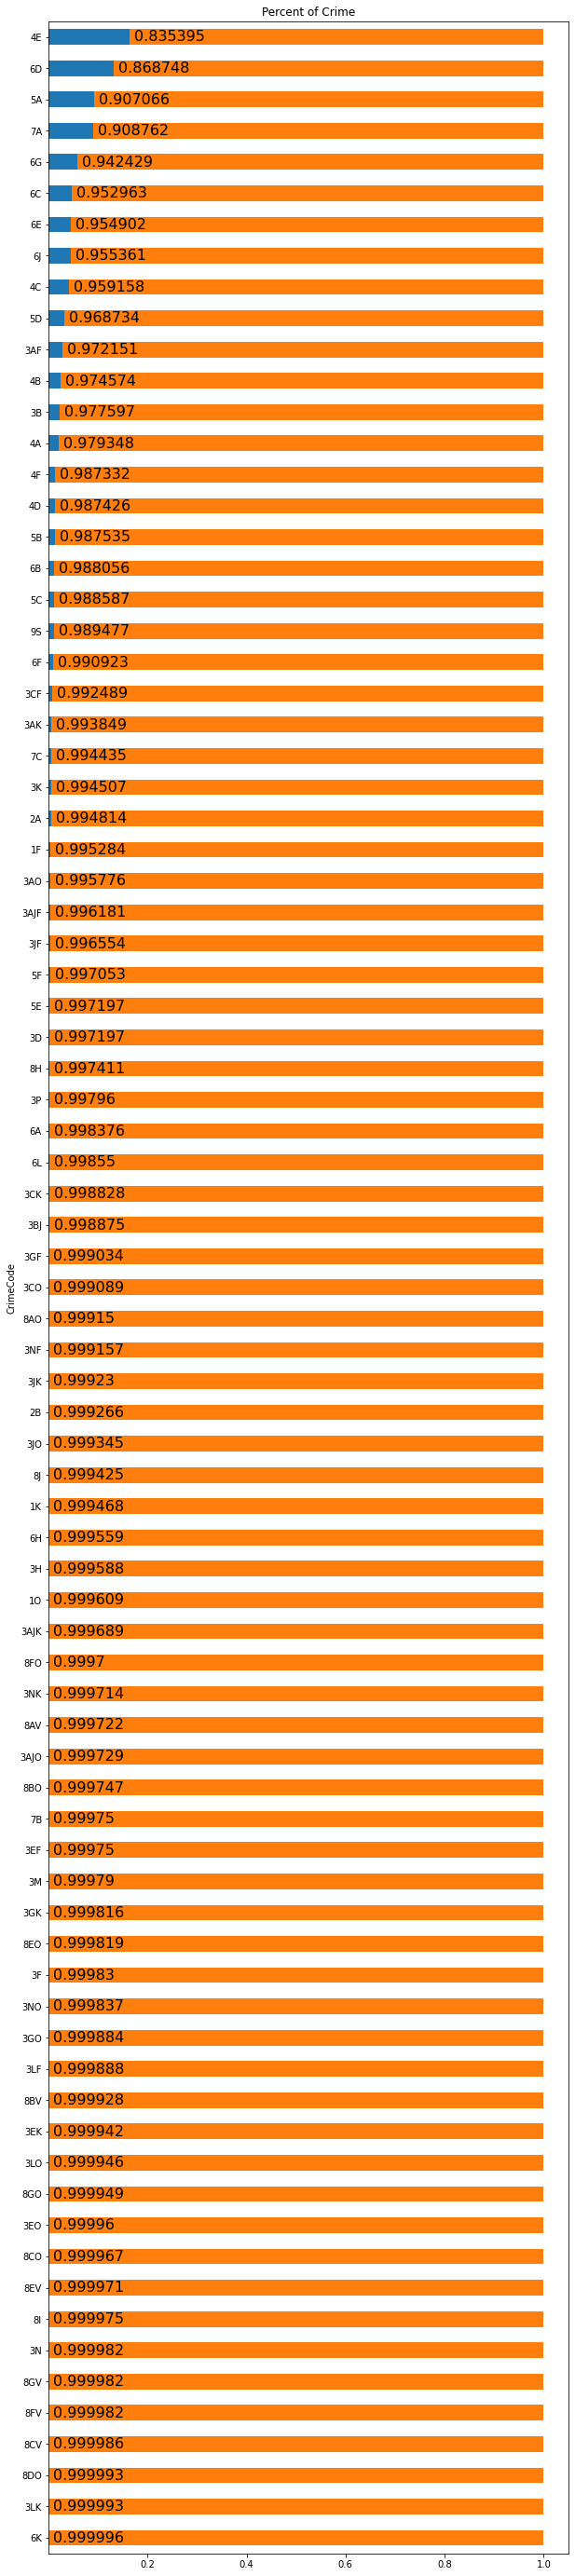

In [57]:
crime_stats.sort_values('Total', ascending = False)
graph = crime_stats[['Percent of Total', 'Percent Not']].sort_values('Percent of Total', ascending=True).plot.barh(figsize=(10,50), stacked=True, grid=False, legend=False, title = 'Percent of Crime')
graph.bar_label(graph.containers[0], 
labels=n.round((1-crime_stats[['Percent of Total']].sort_values('Percent of Total', ascending=True)['Percent of Total']),6), 
color='black', fontsize=16, fmt='%2.2f', padding=5)
graph.set_facecolor('white')

Hii) We can do a multiple linear regression model with each crime code as a different variable. This will be a very large model because of the 81 different codes, but it will give us a linear approach and show us the different crime codes and how it affects the total crime of Baltimore. This will give us a p-value for each variable so we can determine which code is more significant. We will be able to see which crime code is more dominate and has a larger affect on the total crime while others may have a much smaller impact.

Hiii) Having the number of victims affected for each crime would add a lot more hypothesize. One interesting hypothesis would be to determine which crime affects the most number of people, or we could see which location is more dangerous because the number of people affected could be much higher. We could even determine which day of the year is the most dangerous, we could look at holidays and deteremine if crime happens more or less on those days. Added the number of victims for each crime would expand the amount of information we can pull from this data set.

i) Having the date we could determine which day of the year has the most crime. We would be able to manipulate the data to present which day out of the year has the most crime. We would also be able to determine if holidays have any affect on crime rates.